# Neuronové sítě - učení s učitelem - klasifikace

In [ ]:
import tensorflow as tf   # nezapomeňte v Anaconda přepnout prostředí na tensorflow!!!
#print(tf.__version__)  # tisk verze tensorflow

import numpy as np
import matplotlib.pyplot as plt   # možná bude potřeba doinstalovat v novém prostředí!!!

#import tensorflow_datasets as tfds

## Load dataset
---

seznam datasetů v TensorFlow https://www.tensorflow.org/datasets/catalog/overview#all_datasets


In [ ]:
#fashion_mnist = tf.keras.datasets.fashion_mnist
fashion_mnist = tf.keras.datasets.mnist
#fashion_mnist = tf.keras.datasets.cifar10
#fashion_mnist = tfds.image_classification.CatsVsDogs
#fashion_mnist = tf.keras.datasets.reuters



#print(fashion_mnist.)
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [ ]:
train_images.shape  # rozměry trénovacích dat (počet, šířka obrázku, výška obrázku)
test_images.shape   # rozměry testovacích dat

train_images = train_images / 255.0   # normalizace dat - původní od 0 do 255
test_images = test_images / 255.0

# jména tříd
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
#class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
    
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

#class_names = ['cars', 'trucks','human figures','airplanes','four-legged animals']

    

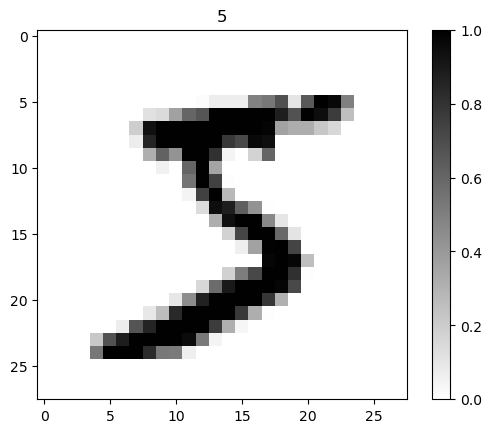

In [ ]:
# shows sample s and its class c
def show_sample(s, c):

    plt.figure()
    plt.imshow(s, cmap=plt.cm.binary)
    plt.colorbar()
    plt.grid(False)
    plt.title(c)
    plt.show()
    
show_sample(train_images[0], class_names[train_labels[0]])    
    

In [ ]:
#for i in range(5):
#    show_sample(train_images[i], class_names[train_labels[i]])
    

## Neuronová síť - stavba
---
různé typy vrstev v tf.keras.layers - (https://www.tensorflow.org/api_docs/python/tf/keras/layers)

různé typy aktivačních funkcí - (https://www.tensorflow.org/api_docs/python/tf/keras/activations)

In [ ]:

# example of a 3-block vgg style architecture

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # transformuje 2D obrazek do 1D vektoru
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(10)
])

In [ ]:
# optimizer - způsob jakým se učíme z chyb na základě dat  
# loss - měření chyby vstup-výstup, snažíme se minimalizovat
# metrics - monitorování, jak nám jde trénování 



model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Neuronové síť - učení
---

In [ ]:
model.fit(train_images, train_labels, epochs=30)


Epoch 1/30
1875/1875 [==============================] - 11s 5ms/step - loss: 0.3915 - accuracy: 0.8984
Epoch 2/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1916 - accuracy: 0.9444
Epoch 3/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1402 - accuracy: 0.9598
Epoch 4/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1086 - accuracy: 0.9693
Epoch 5/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0872 - accuracy: 0.9755
Epoch 6/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0716 - accuracy: 0.9798
Epoch 7/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0595 - accuracy: 0.9836
Epoch 8/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0494 - accuracy: 0.9863
Epoch 9/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0418 - accuracy: 0.9888
Epoch 10/30
1875/1875 [==============================] - 13s 7ms/step - loss:

## Neuronová síť - evaluace
---

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)


313/313 - 1s - loss: 0.0930 - accuracy: 0.9774 - 650ms/epoch - 2ms/step


## Neuronová síť - predikce
---

In [ ]:
pr_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()]) # přidání softmax vrstvy

In [ ]:
predictions = pr_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
# zobrazí predikci vzorku číslo i
def sample_predict(i, test_images, test_labels, predictions, class_names):
    s = test_images[i]
    c = class_names[test_labels[i]]
    show_sample(s, c)
    
    print("Probabilities")
    print("------------")
    for j in range(len(class_names)):
        print(class_names[j], ":", np.round(predictions[i, j], 2))
    
    ind = np.argmax(predictions[i])
    
    print("------------")
    print("true class:", c, ", predicted class:", class_names[ind])

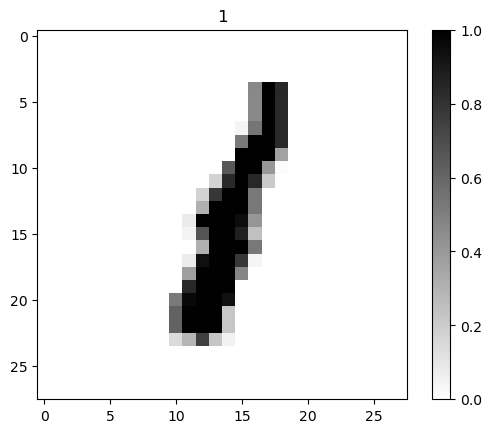

Probabilities
------------
0 : 0.0
1 : 1.0
2 : 0.0
3 : 0.0
4 : 0.0
5 : 0.0
6 : 0.0
7 : 0.0
8 : 0.0
9 : 0.0
------------
true class: 1 , predicted class: 1


In [ ]:
sample_predict(88, test_images, test_labels, predictions, class_names)

## Otázky
---

- Kolik položek jednoho typu bylo klasifikováno správně? 